# <div align="center">**Analisis Risiko Investasi pada Portofolio dengan Value at Risk (VaR) Menggunakan Simulasi Monte Carlo pada Saham Sektor Fast Moving Consumer Goods (FMCG)**</div>

# Kelompok 13


1.   Amalia Nur Zahro (22/492729/PA/21138)
2.   Meila Dwi Nurini (22/497250/PA/21408)
3. Elgita Kisti Cahyani (22/499206/PA/21536)



# Pendahuluan

Investasi di sektor barang konsumen cepat bergerak *(Fast Moving Consumer Goods/FMCG)* telah menjadi pilihan menarik bagi banyak investor. Sektor ini menawarkan potensi pertumbuhan yang stabil karena kebutuhan konsumen terhadap produk-produk FMCG cenderung bersifat inelastic. Namun, seperti halnya investasi lainnya, investasi di sektor FMCG juga dihadapkan pada berbagai risiko.

Untuk mengukur dan mengelola risiko investasi, para pelaku pasar seringkali menggunakan berbagai metrik, salah satunya adalah *Value at Risk (VaR)*. VaR merupakan suatu ukuran kuantitatif yang menunjukkan potensi kerugian maksimum suatu portofolio investasi dalam periode tertentu dengan tingkat kepercayaan tertentu. Dengan kata lain, VaR memberikan gambaran tentang seberapa besar kerugian yang mungkin terjadi pada suatu portofolio dalam kondisi pasar yang buruk.

Simulasi Monte Carlo adalah salah satu metode yang populer digunakan untuk menghitung VaR. Metode ini memungkinkan kita untuk menghasilkan sejumlah besar skenario pasar masa depan secara random, sehingga dapat memberikan gambaran yang lebih komprehensif mengenai distribusi potensi *return* portofolio.

#Metodologi

## VaR

Value at Risk (**VaR**) adalah metode statistik yang mengukur potensi kerugian maksimum dalam sebuah portofolio dalam periode waktu tertentu dengan tingkat kepercayaan tertentu. VaR menunjukkan batas bawah kerugian yang dapat terjadi pada kondisi normal pasar, dengan kata lain, VaR memperkirakan kerugian terbesar yang dapat terjadi selama jangka waktu tertentu dengan probabilitas tertentu. Dalam penelitian ini, kami menggunakan pendekatan distribusi normal dengan tingkat kepercayaan 95% yang umumnya digunakan dalam praktik keuangan.

## Portofolio

Portofolio merupakan suatu kumpulan aset yang banyak dipilih investor untuk mendapatkan keuntungan. Teori portofolio berkaitan dengan estimasi investor terhadap risiko dan return yang diukur secara statistik untuk membuat portofolio investasinya. Teori portofolio dimulai dengan asumsi bahwa tingkat pengembalian atas sekuritas dimasa depan dapat diestimasi dan kemudian dapat menentukan risiko dengan variasi distribusi (Nadiva, 2016).

## Simulasi Monte Carlo

## Tahapan VaR untuk Portofolio dengan Simulasi Monte Carlo

1. **Menghitung Return Saham**.
    Langkah pertama dalam menghitung VaR portofolio adalah menghitung return harian dari masing-masing saham di dalam portofolio. Return harian ini didapat dari perubahan harga saham per hari menggunakan formula:
    
    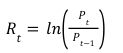

2. **Menghitung Standar Deviasi dan Variansi Portofolio**.
    Setelah menghitung return saham harian, langkah berikutnya adalah menghitung standar deviasi (volatilitas) dan variansi dari masing-masing saham serta portofolio secara keseluruhan. Mengingat portofolio terdiri dari lebih dari satu aset, diperlukan penghitungan kovarian antar saham untuk menghitung variansi portofolio.  
3. **Menghitung VaR Portofolio**.
    Dalam penelitian ini, VaR dihitung berdasarkan distribusi normal, menggunakan rumus:

    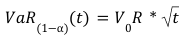

   Dengan 𝑅 adalah nilai
 kuantil ke-α dari distribusi return.
    Berdasarkan distribusi normal, VaR dengan tingkat kepercayaan 95% berarti terdapat kemungkinan 5% bahwa kerugian portofolio akan melebihi batas VaR yang dihitung.
4. **Simulasi Monte Carlo**.
    Sebagai metode alternatif, simulasi Monte Carlo dapat digunakan untuk menghitung VaR. Dalam pendekatan ini, ribuan skenario acak dari return saham disimulasikan berdasarkan distribusi return historis, lalu VaR dihitung berdasarkan distribusi hasil simulasi tersebut.

# Deskripsi Dataset

Data yang digunakan dalam penelitian ini diambil dari **Yahoo Finance**, yang menyediakan harga saham harian untuk empat perusahaan terdaftar di Bursa Efek Indonesia, yaitu **INDF** (PT Indofood Sukses Makmur Tbk), **JPFA** (PT Japfa Comfeed Indonesia Tbk), **ULTJ** (PT Ultrajaya Milk Industry & Trading Company Tbk), dan **WIIM** (PT Wismilak Inti Makmur Tbk). Data ini mencakup **periode 13 Juni 2024 hingga 13 September 2024**, yang dipilih untuk mencerminkan volatilitas jangka pendek yang relevan dalam perhitungan risiko portofolio.

## Data Harga Saham

Akan diambil data 4 saham dari Yahoo Finance sebagai berikut.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
stockList = ['INDF.JK', 'JPFA.JK', 'ULTJ.JK', 'WIIM.JK']
stocks = [stock for stock in stockList]
endDate = "2024-09-13"
startDate = "2024-06-13"

In [ ]:
# import data
def get_data_1(stocks, start, end):
    stockData = yf.download(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    return stockData

In [ ]:
data = get_data_1(stockList, startDate, endDate)
data
data_saham = data.reset_index(drop=True)

[*********************100%***********************]  4 of 4 completed


In [ ]:
data_saham

Ticker,INDF.JK,JPFA.JK,ULTJ.JK,WIIM.JK
0,6125.0,1330.0,1800.0,950.0
1,6075.0,1290.0,1800.0,930.0
2,5925.0,1385.0,1795.0,915.0
3,5925.0,1395.0,1795.0,945.0
4,5975.0,1445.0,1870.0,995.0
...,...,...,...,...
59,7025.0,1605.0,1815.0,990.0
60,6925.0,1590.0,1790.0,975.0
61,7050.0,1575.0,1805.0,975.0
62,7000.0,1540.0,1805.0,995.0


##  Data Return Saham

Diambil data return saham untuk melakukan uji normaltias return saham.

In [ ]:
# import data
def get_data_2(stocks, start, end):
    stockData = yf.download(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    return returns

In [ ]:
data2 = get_data_2(stockList, startDate, endDate)
data2
data_return = data2.reset_index(drop=True)

[*********************100%***********************]  4 of 4 completed


In [ ]:
data_return = data_return.drop(index=0)

In [ ]:
data_return

Ticker,INDF.JK,JPFA.JK,ULTJ.JK,WIIM.JK
1,-0.008163,-0.030075,0.000000,-0.021053
2,-0.024691,0.073643,-0.002778,-0.016129
3,0.000000,0.007220,0.000000,0.032787
4,0.008439,0.035842,0.041783,0.052910
5,-0.008368,0.006920,-0.010695,0.000000
...,...,...,...,...
59,0.007168,-0.015337,0.000000,0.031250
60,-0.014235,-0.009346,-0.013774,-0.015152
61,0.018051,-0.009434,0.008380,0.000000
62,-0.007092,-0.022222,0.000000,0.020513


## Plot Distribusi Return Saham

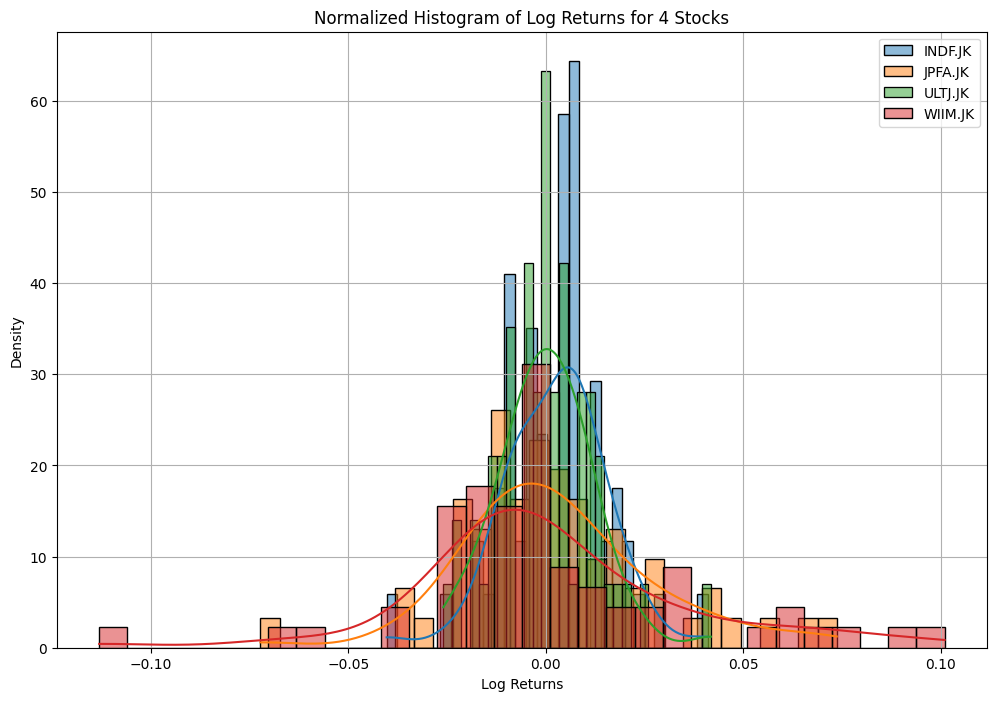

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsi 'log_returns' sudah didefinisikan sebelumnya dan berisi log return dari setiap saham
tickers = ['INDF.JK', 'JPFA.JK', 'ULTJ.JK', 'WIIM.JK']  # Ganti dengan ticker yang sesuai

plt.figure(figsize=(12, 8))

for ticker in tickers:
    sns.histplot(data_return[ticker], kde=True, stat='density', label=ticker, bins=30)

plt.title('Normalized Histogram of Log Returns for 4 Stocks')
plt.xlabel('Log Returns')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## Uji Normalitas Return Saham

In [ ]:
# Uji Normalitas dengan Kolmogorov-Smirnov Test
print("Kolmogorov-Smirnov Test Results:")
for ticker in tickers:
    statistic, p_value = stats.kstest(data_return[ticker], 'norm', args=(data_return[ticker].mean(), data_return[ticker].std()))
    print(f"KS Test for {ticker}: statistic={statistic}, p-value={p_value}")

Kolmogorov-Smirnov Test Results:
KS Test for INDF.JK: statistic=0.10604590848865764, p-value=0.4473799371461592
KS Test for JPFA.JK: statistic=0.11012426179427104, p-value=0.4004941833526942
KS Test for ULTJ.JK: statistic=0.07669738612656368, p-value=0.8248524420123574
KS Test for WIIM.JK: statistic=0.16417543239783805, p-value=0.05950592123777321


Hasil uji normalitas **Kolmogorov-Smirnov** menunjukkan bahwa distribusi log return dari saham **INDF.JK, JPFA.JK, ULTJ.JK, dan WIIM.JK** tidak berbeda secara signifikan dari distribusi normal, dengan p-value masing-masing di atas 0.05. Ini berarti bahwa asumsi normalitas pada data return saham-saham tersebut dapat diterima atau data tersebut **berdistribusi normal**, yang memungkinkan analisis lebih lanjut dilakukan dengan metode statistik yang mengandalkan distribusi normal. Dengan demikian, hasil ini memberikan landasan yang kuat untuk studi selanjutnya terkait analisis risiko dan pengembalian portofolio investasi yang melibatkan saham-saham tersebut.

## Plot Grafik Data Return Saham

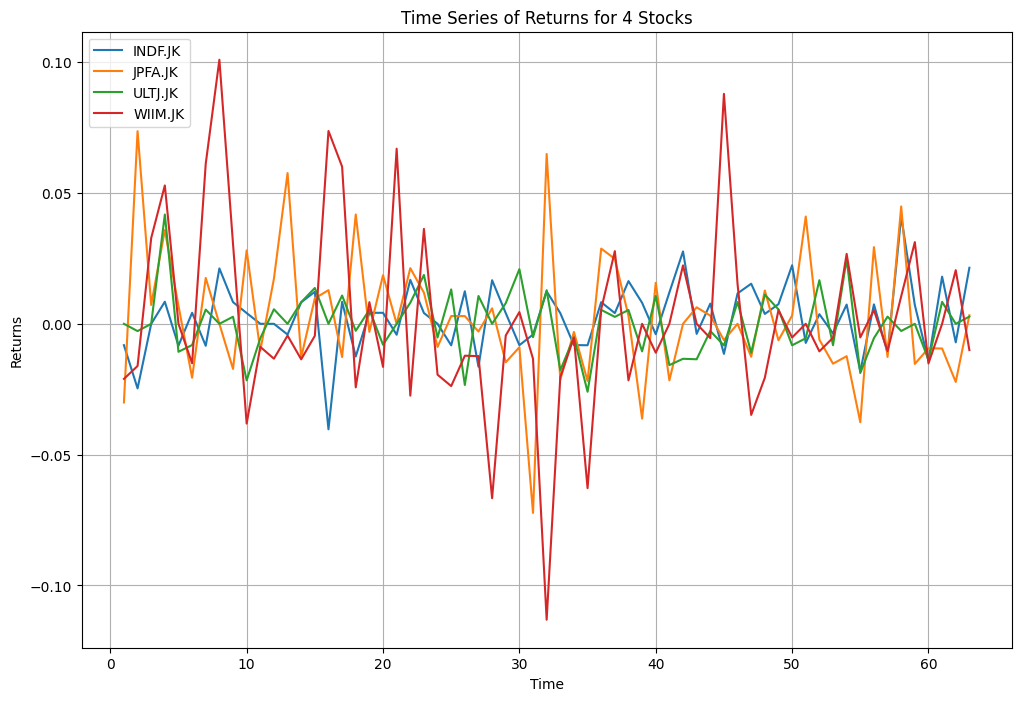

In [ ]:
# Plot Time Series dari Returns
plt.figure(figsize=(12, 8))

for ticker in tickers:
    plt.plot(data_return[ticker], label=ticker)

plt.title('Time Series of Returns for 4 Stocks')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Berdasar plot time series log return saham ke empat saham menunjukkan pola yang cukup stabil dalam jangka panjang, dengan variasi minimal di sekitar rata-rata, yang mencerminkan kinerja yang konsisten. Namun, terdapat fluktuasi tajam pada periode tertentu, terutama pada saham WIIM.JK yang mungkin disebabkan oleh berita perusahaan, perubahan kondisi pasar, atau peristiwa makroekonomi yang berdampak pada saham tersebut. Lonjakan ini menunjukkan respons pasar yang kuat terhadap informasi yang relevan, menandakan risiko yang lebih tinggi dalam jangka pendek. Meskipun demikian, stabilitas jangka panjang yang terlihat pada log return mengindikasikan potensi pemulihan setelah fluktuasi, sehingga penting bagi investor untuk mempertimbangkan strategi yang tepat dalam mengelola risiko, seperti diversifikasi portofolio.








# Hasil dan Pembahasan

Pada bagian ini, akan diterangkan proses pengambilan data historis dan analisis portofolio saham menggunakan **simulasi Monte Carlo**. Langkah awal yang dilakukan adalah **meng-*impor* beberapa *library***, yaitu yfinance, pandas, numpy, serta matplotlib, dengan masing-masing kegunaannya untuk mengambil data saham melalui Yahoo Finance, manipulasi data, komputasi numerik, dan visualisasi hasil.

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

Selanjutnya, dilakukan **pengambilan data harga penutupan saham** dari beberapa perusahaan yang terdaftar di Bursa Efek Indonesia, dengan kode saham INDF.JK, JPFA.JK, ULTJ.JK, WIIM.JK dalam periode **13 Juni 2024 hingga 13 September 2024**. Penghitungan return harian serta matriks kovarians dari data return saham dilakukan untuk menghitung risiko dan korelasi antar saham. Berat (weights) untuk masing-masing saham dalam portofolio ditentukan secara acak dan dinormalisasi agar jumlah totalnya mencapai 100%.

In [ ]:
# import data
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [ ]:
stockList = ['INDF.JK', 'JPFA.JK', 'ULTJ.JK', 'WIIM.JK']
stocks = [stock for stock in stockList]
endDate = "2024-09-13"
startDate = "2024-06-13"

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

[*********************100%***********************]  4 of 4 completed


In [ ]:
meanReturns

,0
Ticker,
INDF.JK,0.002543
JPFA.JK,0.002683
ULTJ.JK,0.000159
WIIM.JK,0.001171


In [ ]:
covMatrix

Ticker,INDF.JK,JPFA.JK,ULTJ.JK,WIIM.JK
Ticker,,,,
INDF.JK,0.000170,0.000013,0.000014,-0.000039
JPFA.JK,0.000013,0.000618,0.000065,-0.000083
ULTJ.JK,0.000014,0.000065,0.000145,0.000086
WIIM.JK,-0.000039,-0.000083,0.000086,0.001219


Setelah itu, dilakukan **simulasi Monte Carlo** untuk memprediksi kinerja portofolio saham selama **100 hari ke depan**. Sebanyak 100 simulasi dilakukan, di mana setiap simulasi memperhitungkan *return* harian yang dihasilkan dari distribusi normal yang belum berkorelasi. Setelah itu, korelasi antar *return* diperhitungkan menggunakan dekomposisi Cholesky dari matriks kovarians. Hasil akhirnya adalah nilai portofolio untuk setiap hari di setiap simulasi.

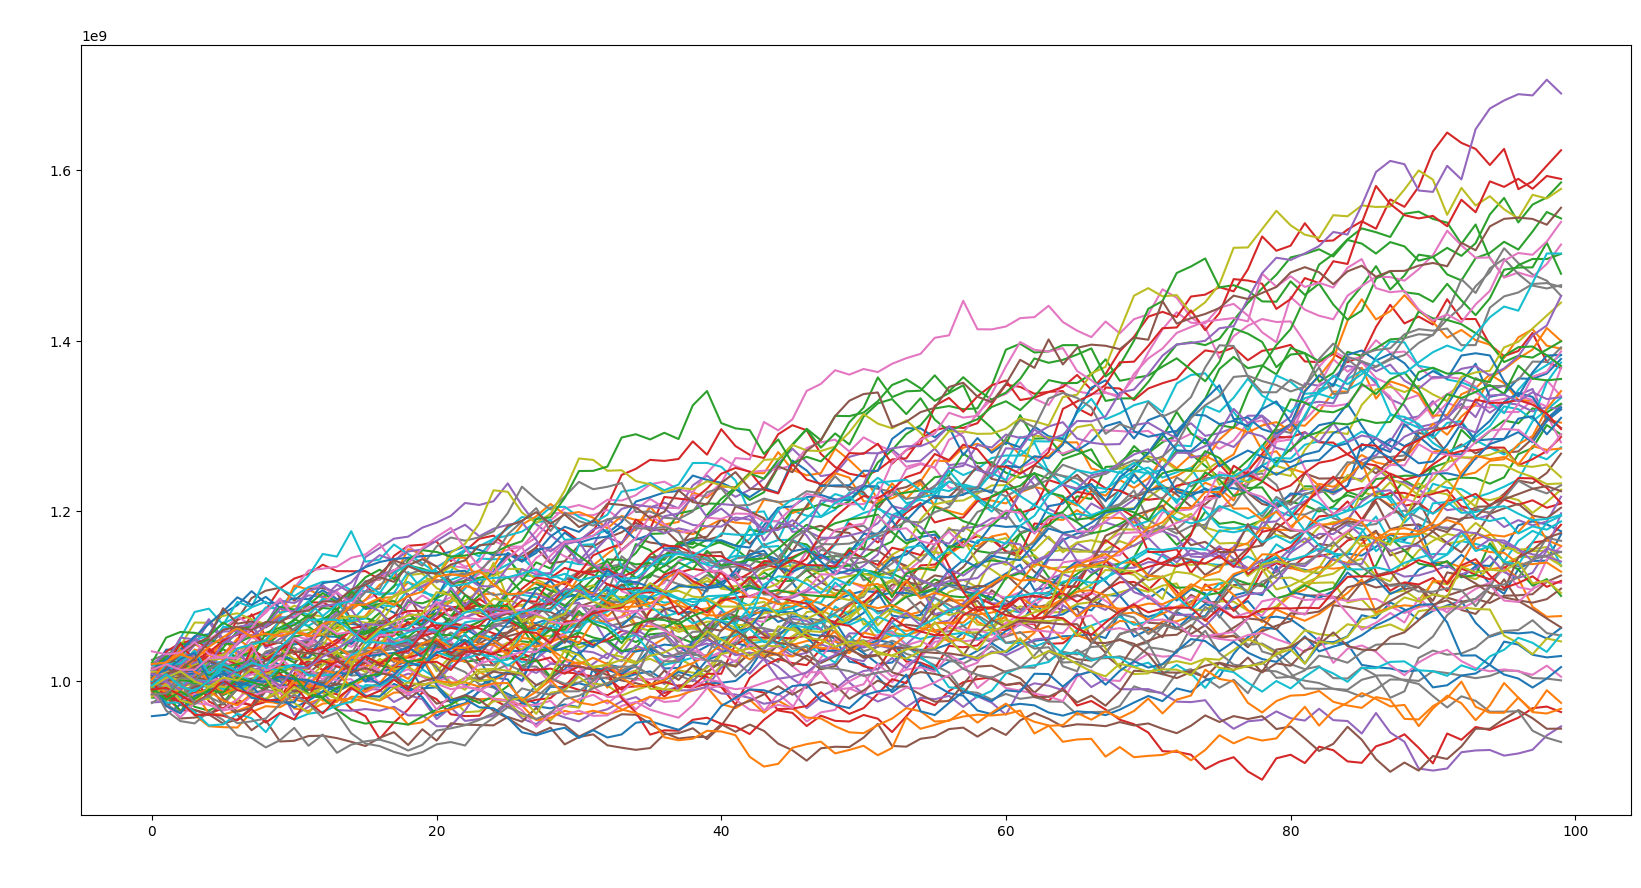

In [ ]:
# Monte Carlo simulation
mc_sims = 100 # number of simulations
T = 100 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 1000000000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 25,
        }
plt.figure(figsize=(20, 10))
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value (Rp)',  fontdict=font)
plt.xlabel('Days',  fontdict=font)
plt.title('Monte carlo simulation of a stock portfolio',  fontdict=font)
plt.show()

**Interpretasi Grafik** <br>

Grafik di atas menampilkan hasil simulasi Monte Carlo yang memproyeksikan kinerja portofolio saham selama 100 hari mendatang, berdasarkan 100 simulasi. Setiap garis berwarna mewakili satu jalur simulasi untuk portofolio saham. Mayoritas simulasi menunjukkan tren kenaikan nilai portofolio dari Rp1 miliar, mengindikasikan potensi pertumbuhan positif. Namun, terdapat variasi yang cukup besar antar simulasi, dengan beberapa mencapai lebih dari Rp1,4 miliar sementara yang lain tetap mendekati nilai awal atau bahkan menurun.

Fluktuasi harian yang terlihat pada grafik menunjukkan adanya volatilitas dan risiko dalam portofolio ini. Meskipun secara keseluruhan tren cenderung naik, hasil setiap simulasi berbeda-beda, mencerminkan ketidakpastian pasar. Grafik ini memberikan wawasan visual mengenai potensi pengembalian dan risiko berdasarkan data historis dan distribusi normal dari return harian saham.

Implementasi perhitungan Value at Risk (VaR) dan Conditional Value at Risk (CVaR) menggunakan simulasi Monte Carlo bertujuan untuk menilai risiko dari portofolio saham. Dua fungsi, mcVaR dan mcCVaR, didefinisikan untuk menghitung VaR dan CVaR berdasarkan distribusi return portofolio. Fungsi mcVaR menghitung VaR sebagai persentil dari distribusi return pada tingkat kepercayaan tertentu, misalnya 95%. Jika input yang diberikan bukan dalam bentuk pandas.Series, fungsi ini akan mengembalikan pesan kesalahan. Sementara itu, mcCVaR menghitung CVaR atau Expected Shortfall dengan mencari rata-rata return yang berada di bawah nilai VaR.

In [ ]:
def mcVaR(returns, alpha):
    """ Input: pandas series of returns
        Output: percentile on return distribution to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected a pandas data series.")

def mcCVaR(returns, alpha):
    """ Input: pandas series of returns
        Output: CVaR or Expected Shortfall to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= mcVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()
    else:
        raise TypeError("Expected a pandas data series.")

Hasil simulasi portofolio pada hari terakhir digunakan untuk menghitung VaR dan CVaR. Nilai VaR dihitung sebagai selisih antara nilai portofolio awal (Rp1 miliar) dan hasil dari fungsi mcVaR, menunjukkan kerugian maksimum yang diharapkan pada tingkat kepercayaan 95%. CVaR, di sisi lain, dihitung sebagai rata-rata kerugian yang diharapkan jika kerugian melampaui VaR. Hasil perhitungan VaR dan CVaR kemudian dicetak dengan format yang mudah dibaca, memberikan informasi tentang potensi kerugian terbesar (VaR) dan kerugian rata-rata (CVaR) dalam kondisi pasar yang buruk, sehingga membantu dalam memahami risiko ekstrem dari portofolio yang dianalisis.

In [ ]:
# You will probably want to print results!!
portResults = pd.Series(portfolio_sims[-1,:])

VaR = initialPortfolio - mcVaR(portResults, 5)
CVaR = initialPortfolio - mcCVaR(portResults, 5)

print('VaR {:,.2f}'.format(VaR,2))
print('CVaR {:,.2f}'.format(CVaR,2))

VaR 25,743,706.63
CVaR 49,745,468.95


# Kesimpulan

Berdasarkan analisis risiko investasi pada portofolio dengan value at risk (VaR) menggunakan simulasi monte carlo dengan investasi awal Rp1 miliar dengan tingkat kepercayaan 95% didapatkan informasi tentang potensi kerugian terbesar (VaR) dalam 100 hari sebesar Rp25.743.706,63 dan kerugian rata-rata (CVaR) sebesar Rp95.745.468,95. Secara keseluruhan, penelitian ini memberikan kontribusi dalam pemahaman yang lebih baik mengenai risiko investasi pada portofolio saham sektor FMCG.